# Accessibility to Public Services: Ecuador Case

In [6]:
import geopandas as gpd #Para archivos .shp 
import matplotlib.pyplot as plt #Para gráficar 
#Se define el tamaño de salidad de las gráficas

import numpy as np 
import pandas as pd

from shapely import wkt
import geopy.distance
from math import radians, cos, sin, asin, sqrt

from pandas.core.frame import DataFrame
from functools import reduce
import pyproj as pp
from pyproj import Proj

In [7]:
#Database from MIES

# BDH and others pensions 
df_1 = pd.read_excel("https://info.inclusion.gob.ec/images/usuarios_externos/2022/BENEFICIARIOS_BONOS_PENSIONES_JUL2022.xls", sheet_name= "PARTE 1 JULIO2022")
df_2 = pd.read_excel("https://info.inclusion.gob.ec/images/usuarios_externos/2022/BENEFICIARIOS_BONOS_PENSIONES_JUL2022.xls", sheet_name= "PARTE 2 JULIO2022")
df_MIES = pd.concat([df_1, df_2], ignore_index=True)
df_MIES.head(2)

,zp,ud_mies,dpa_provin,dpa_despro,dpa_cant,dpa_descan,dpa_parroq,dpa_despar,beneficio,edad,lat,lon,corte
0,Zona Planificación 6,UNIDAD DESCONCENTRADA ZONAL 6,1,AZUAY,108,SANTA ISABEL,10851,ABDON CALDERON (LA UNION),PENSION MIS MEJORES AÑOS,73.0,-3.200741,-79.293510,julio_2022
1,Zona Planificación 6,UNIDAD DESCONCENTRADA ZONAL 6,1,AZUAY,101,CUENCA,10150,CUENCA,PENSION PARA ADULTOS MAYORES,81.0,-2.888826,-79.043392,julio_2022


<AxesSubplot:>

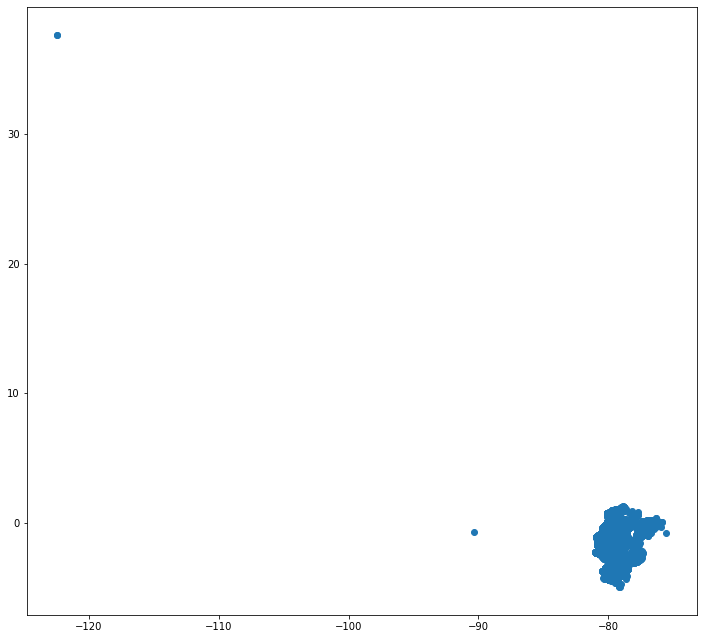

In [12]:
# Convertir la base RS2018 en formato espacial

df_MIES_gdf= gpd.GeoDataFrame(df_MIES, geometry= gpd.points_from_xy(df_MIES['lon'],df_MIES['lat']))
df_MIES_gdf['geometry'] = df_MIES_gdf['geometry'].astype(str).apply(wkt.loads)
gdf_hog = gpd.GeoDataFrame(df_MIES_gdf, crs='epsg:4326')
gdf_hog.plot()